In [1]:
import nanslice.jupyter as ns
import h5py

In [2]:
matrix = 64
read_os = 2
snr = 100
chan = 16
rings = 2
!rm *.h5
!rm *.nii

# Reference Data Set

First simulate a reference phantom dataset with no dead-time gap and directly extract SENSE maps as a reference

In [3]:
!riesling phantom --matrix=$matrix --read=$read_os --snr=$snr --channels=$chan --rings=$rings --shepp_logan --kb full

In [4]:
!riesling sense --kb full.h5 --sense=direct --maps -o full-direct
!riesling cg --kb full.h5 --sense=direct -o full-direct

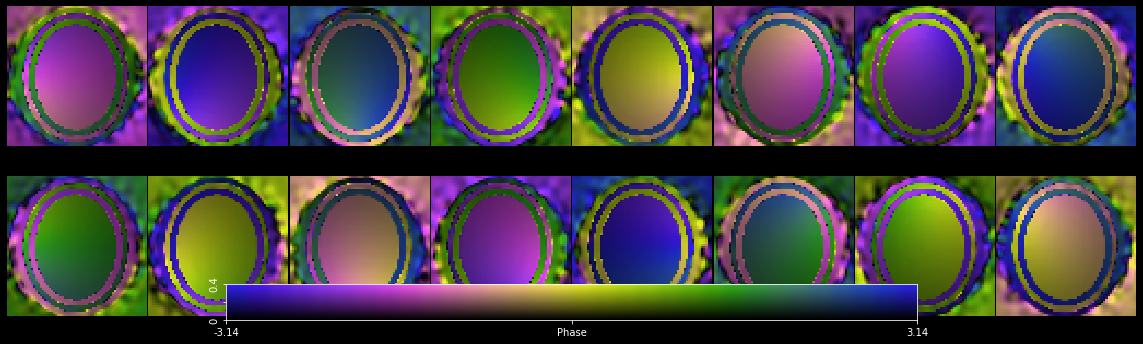

In [5]:
f = ns.sense('full-direct-sense-maps.nii', cols=8, clim=(0,0.4))
f.savefig('full-direct-sense-maps.png')
f

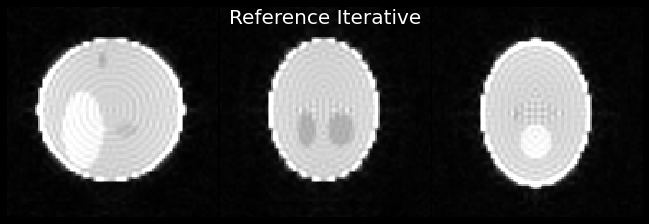

In [23]:
f = ns.three_plane('full-direct-cg.nii', component='mag', title='Reference Iterative')
f.savefig('full-direct-cg.png')
f

# Gap Data

Now simulate a phantom including a dead-time gap and repeat the above. Note how the directly-extracted maps are corrupted

In [7]:
gap=3
!riesling phantom --matrix=$matrix --read=$read_os --snr=$snr --channels=$chan --rings=$rings --shepp_logan --kb gap --gap=$gap

In [8]:
!riesling sense --kb gap.h5 --sense="espirit" --maps -o gap-espirit -v

Starting operation: sense
Read wisdom successfully
Opened file gap.h5 for reading
Reading trajectory
Read dataset: trajectory
Created trajectory object with 4096 spokes
Grid size 128,128,128, oversample 2
Generated 245760 co-ordinates in 41 ms
Using Pipe/Zwart/Menon SDC...
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...SDC Delta 20.536898
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...SDC Delta 0.44062948
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...SDC Delta 0.13181603
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...Combining thread workspaces
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...SDC Delta 0.07361719
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...

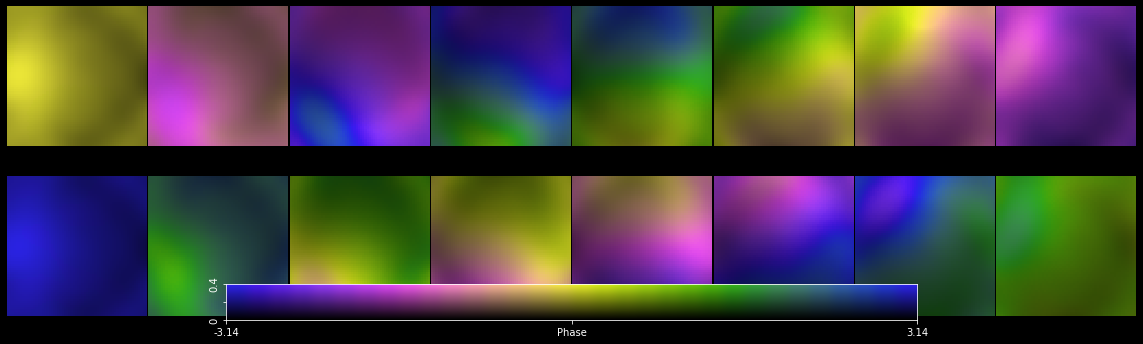

In [9]:
f = ns.sense('gap-espirit-sense-maps.nii', cols=8, clim=(0,0.4))
f.savefig('gap-espirit-sense-maps.png')
f

In [10]:
!riesling sense --kb gap.h5 --sense="direct" --maps -o gap-direct

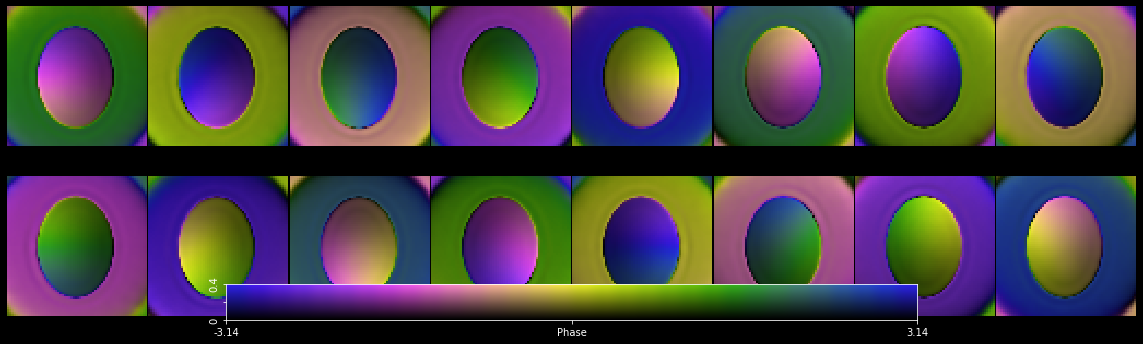

In [11]:
f = ns.sense('gap-direct-sense-maps.nii', cols=8, clim=(0,0.4))
f.savefig('gap-direct-sense-maps.png')
f

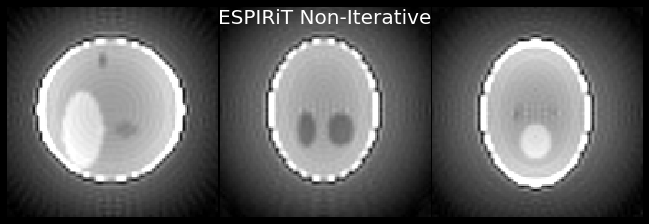

In [24]:
f = ns.three_plane('gap-espirit-sense.nii', component='mag', title='ESPIRiT Non-Iterative')
f.savefig('gap-espirit-sense.png')
f

# Iterative Reconstructions

Now perform some iterative recons and compare the results. These will take a while to run

In [13]:
!riesling cg --kb full.h5 --sense="direct" -o full-direct
!riesling cg --kb gap.h5 --sense="direct" -o gap-direct

In [14]:
!riesling cg --kb full.h5 --sense="espirit" -o full-espirit
!riesling cg --kb gap.h5 --sense="espirit" -o gap-espirit

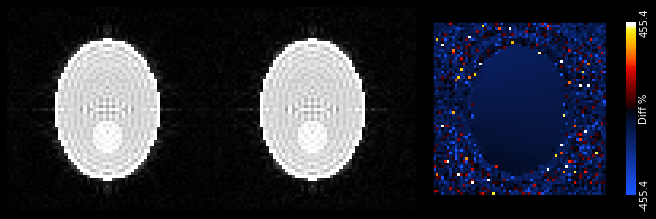

In [15]:
ns.compare('full-espirit-cg.nii', 'full-direct-cg.nii', component='mag')

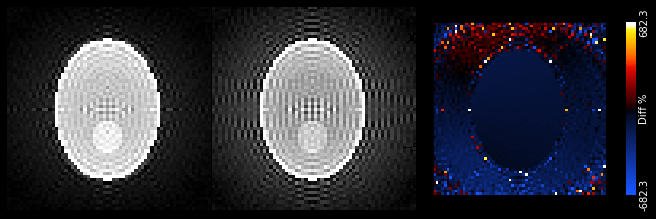

In [16]:
ns.compare('gap-espirit-cg.nii', 'gap-direct-cg.nii', component='mag')

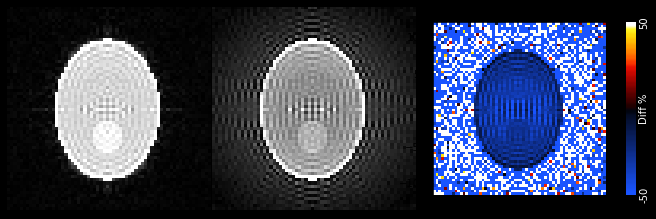

In [17]:
ns.compare('full-direct-cg.nii', 'gap-direct-cg.nii', component='mag', diff_clim=(-50, 50))

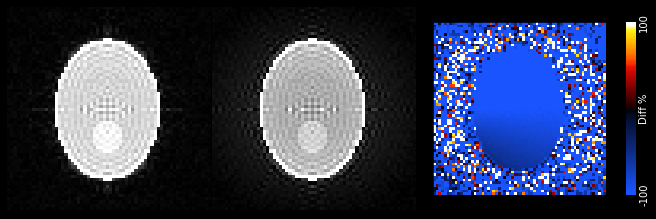

In [18]:
ns.compare('full-direct-cg.nii', 'gap-espirit-cg.nii', component='mag', diff_clim=(-100, 100))

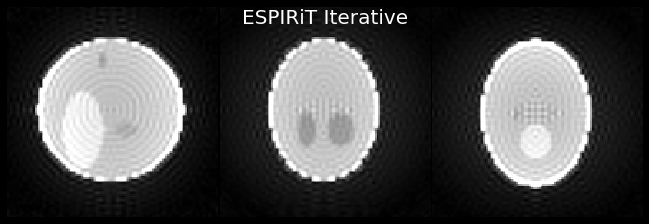

In [25]:
f = ns.three_plane('gap-espirit-cg.nii', component='mag', title='ESPIRiT Iterative')
f.savefig('gap-espirit-cg.png')
f

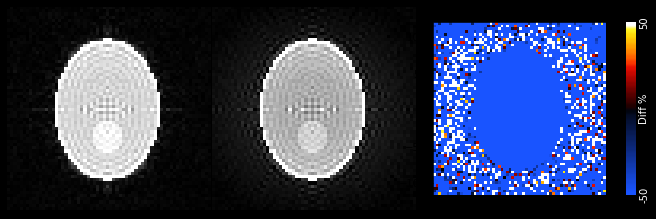

In [27]:
ns.compare('full-direct-cg.nii', 'gap-espirit-cg.nii', component='mag', diff_clim=(-50,50))